##Лабораторная работа №0
|Студент|Ивенкова Л.В.|
|-------|-------------|
| Группа | М8О-408Б-19 |
| Почта | gemilvvilv@gmail.com |

**Цель работы:** Выбрать набор данных. Поставить задачу, которую необходимо решить с помощью эти данных. Определить что нужно получить на выходе, как это измерять, посмотреть на сами данные. Определить являются ли данные грязными или чистыми. Есть ли у данных пропуски. Как зависят между собой признаки.  

Задача: На наборе данных о сердечных приступах подготовить данные для решения бинарной классификации большей или меньшей вероятности сердечного приступа. С помощью датасета необходимо определять, какова вероятность сердечного приступа у пациента (0 - низкая, 1 - высокая).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [82]:
data = pd.read_csv('riceClassification.csv')

In [83]:
data

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
0          1  4537        92.229316        64.012769      0.719916   
1          2  2872        74.691881        51.400454      0.725553   
2          3  3048        76.293164        52.043491      0.731211   
3          4  3073        77.033628        51.928487      0.738639   
4          5  3693        85.124785        56.374021      0.749282   
...      ...   ...              ...              ...           ...   
18180  18181  5853       148.624571        51.029281      0.939210   
18181  18182  7585       169.593996        58.141659      0.939398   
18182  18183  6365       154.777085        52.908085      0.939760   
18183  18184  5960       151.397924        51.474600      0.940427   
18184  18185  6134       153.081981        51.590606      0.941500   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
0            4677      76.004525  0.657536    273.085   0.764510   
1            3015      60.471018  0.713009    208.317   0.831658   
2            3132      62.296341  0.759153    210.012   0.868434   
3            3157      62.551300  0.783529    210.657   0.870203   
4            3802      68.571668  0.769375    230.332   0.874743   
...           ...            ...       ...        ...        ...   
18180        6008      86.326537  0.498594    332.960   0.663444   
18181        7806      98.272692  0.647461    385.506   0.641362   
18182        6531      90.023162  0.561287    342.253   0.682832   
18183        6189      87.112041  0.492399    343.371   0.635227   
18184        6283      88.374495  0.489975    338.613   0.672274   

       AspectRation  Class  
0          1.440796      1  
1          1.453137      1  
2          1.465950      1  
3          1.483456      1  
4          1.510000      1  
...             ...    ...  
18180      2.912535      0  
18181      2.916910      0  
18182      2.925396      0  
18183      2.941216      0  
18184      2.967245      0  

[18185 rows x 12 columns]

In [84]:
data.drop(['id'], axis=1, inplace=True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


Из выведенной информации видно что датасет содержит в себе только **числовые** типы данных:  

* int64 - 3
* float64 - 8

Проверим данные на пропуски:

In [86]:
data.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

Пропусков нет, всё хорошо

Теперь преобразуем все целочисленные значения к типу float

In [87]:
for column in data.columns:
    if data[column].dtype == 'int64':
        data[column] = data[column].apply(float)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  float64
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  float64
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  float64
dtypes: float64(11)
memory usage: 1.5 MB


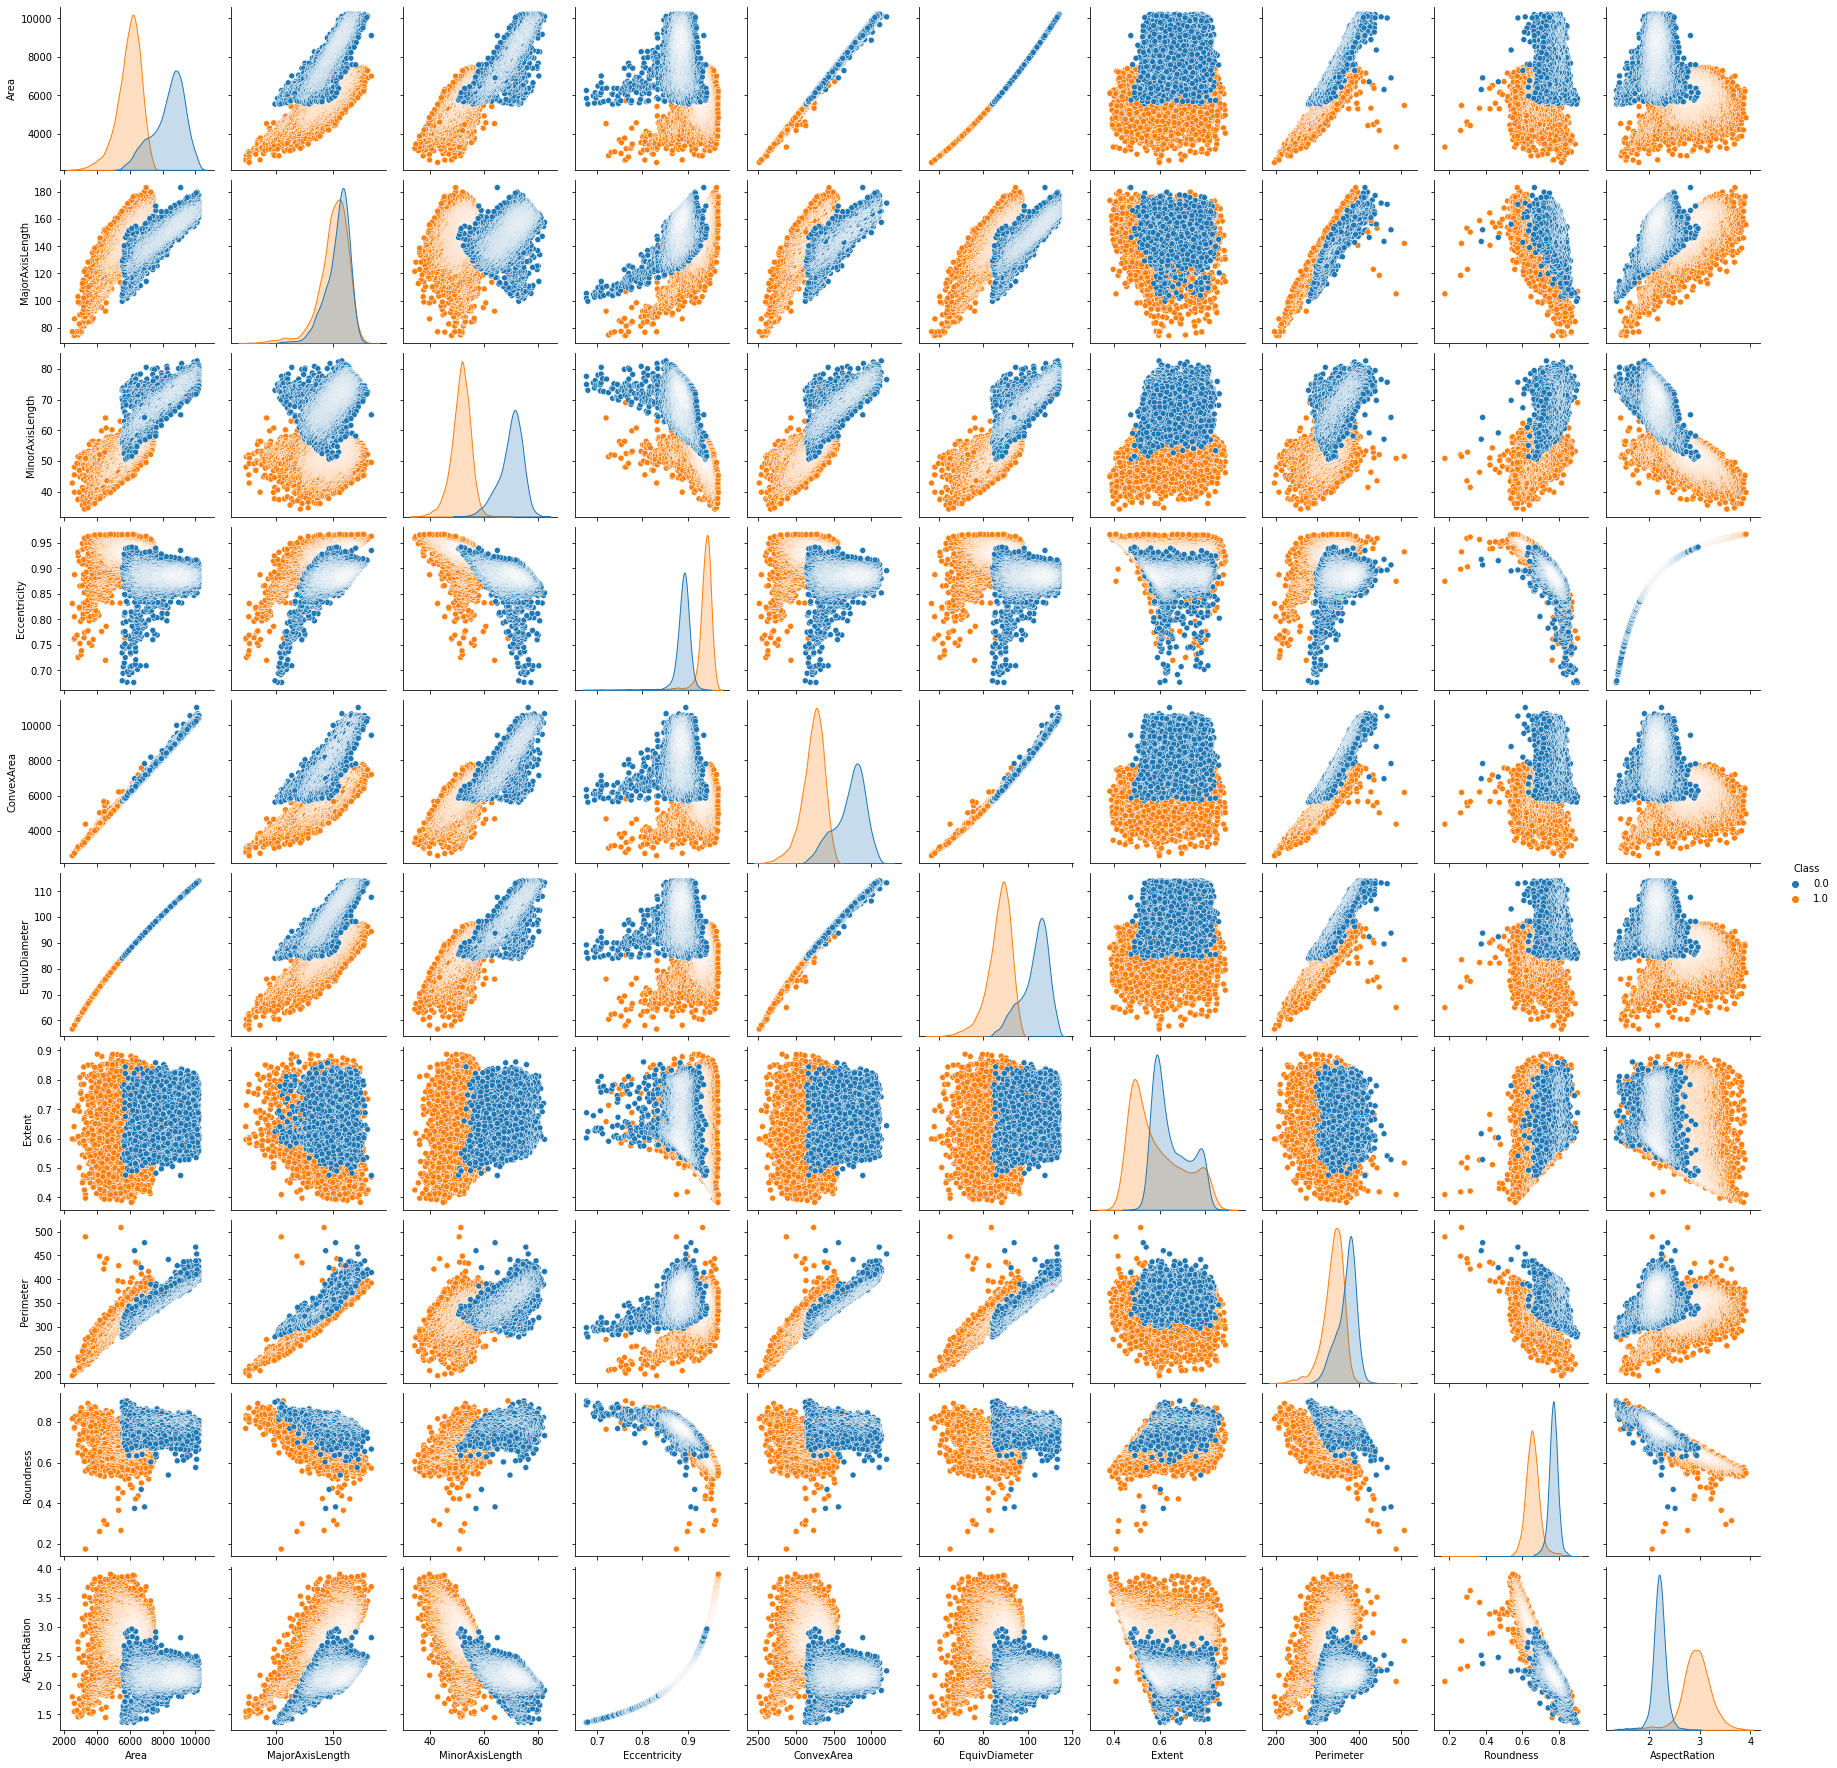

In [90]:
sns.pairplot(data = data, hue = "Class")
pass

In [91]:
corrMatrix = data.corr()
corrMatrix

Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
Area             1.000000         0.599939         0.930215     -0.550073   
MajorAxisLength  0.599939         1.000000         0.273211      0.295717   
MinorAxisLength  0.930215         0.273211         1.000000     -0.808640   
Eccentricity    -0.550073         0.295717        -0.808640      1.000000   
ConvexArea       0.999362         0.602061         0.928992     -0.547896   
EquivDiameter    0.998158         0.618002         0.923790     -0.534688   
Extent           0.230541        -0.073549         0.308541     -0.329954   
Perimeter        0.881540         0.870178         0.674249     -0.165915   
Roundness        0.620490        -0.202566         0.834398     -0.903657   
AspectRation    -0.623979         0.240471        -0.860516      0.950301   
Class           -0.816589        -0.147741        -0.917766      0.788636   

                 ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
Area               0.999362       0.998158  0.230541   0.881540   0.620490   
MajorAxisLength    0.602061       0.618002 -0.073549   0.870178  -0.202566   
MinorAxisLength    0.928992       0.923790  0.308541   0.674249   0.834398   
Eccentricity      -0.547896      -0.534688 -0.329954  -0.165915  -0.903657   
ConvexArea         1.000000       0.997403  0.227359   0.886987   0.610236   
EquivDiameter      0.997403       1.000000  0.225944   0.891567   0.607432   
Extent             0.227359       0.225944  1.000000   0.073227   0.366793   
Perimeter          0.886987       0.891567  0.073227   1.000000   0.186063   
Roundness          0.610236       0.607432  0.366793   0.186063   1.000000   
AspectRation      -0.621472      -0.609957 -0.350875  -0.227256  -0.947875   
Class             -0.814214      -0.809361 -0.303440  -0.533274  -0.831759   

                 AspectRation     Class  
Area                -0.623979 -0.816589  
MajorAxisLength      0.240471 -0.147741  
MinorAxisLength     -0.860516 -0.917766  
Eccentricity         0.950301  0.788636  
ConvexArea          -0.621472 -0.814214  
EquivDiameter       -0.609957 -0.809361  
Extent              -0.350875 -0.303440  
Perimeter           -0.227256 -0.533274  
Roundness           -0.947875 -0.831759  
AspectRation         1.000000  0.832563  
Class                0.832563  1.000000

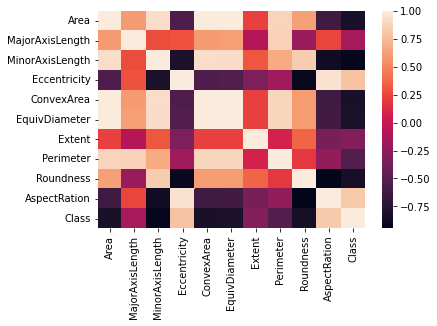

In [92]:
sns.heatmap(corrMatrix)
pass

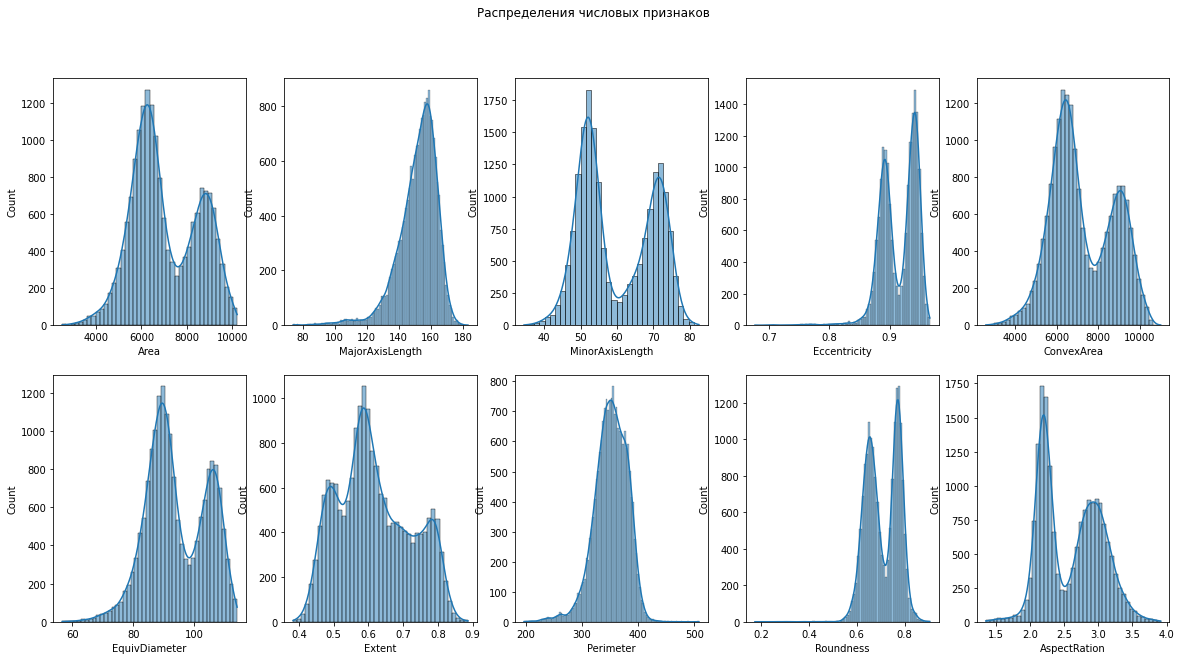

In [93]:
def visualize(dataset):
    fig, ax = plt.subplots(2, 5, figsize = (20, 10))
    fig.suptitle('Распределения числовых признаков')
    cols = data.columns
    for i in range(10):
        sns.histplot(data[cols[i]], ax = ax[i // 5][i % 5], kde = True)
    pass

visualize(data)

Имеется небольшое количество выбросов у некоторых признаков. Удалим их.

In [95]:
data = data.loc[data['Roundness'] >= 0.55]
data = data.loc[data['Perimeter'] <= 425]
data = data.loc[data['Eccentricity'] >= 0.85]


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17840 entries, 89 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             17840 non-null  float64
 1   MajorAxisLength  17840 non-null  float64
 2   MinorAxisLength  17840 non-null  float64
 3   Eccentricity     17840 non-null  float64
 4   ConvexArea       17840 non-null  float64
 5   EquivDiameter    17840 non-null  float64
 6   Extent           17840 non-null  float64
 7   Perimeter        17840 non-null  float64
 8   Roundness        17840 non-null  float64
 9   AspectRation     17840 non-null  float64
 10  Class            17840 non-null  float64
dtypes: float64(11)
memory usage: 1.6 MB


In [96]:
visualize(data)

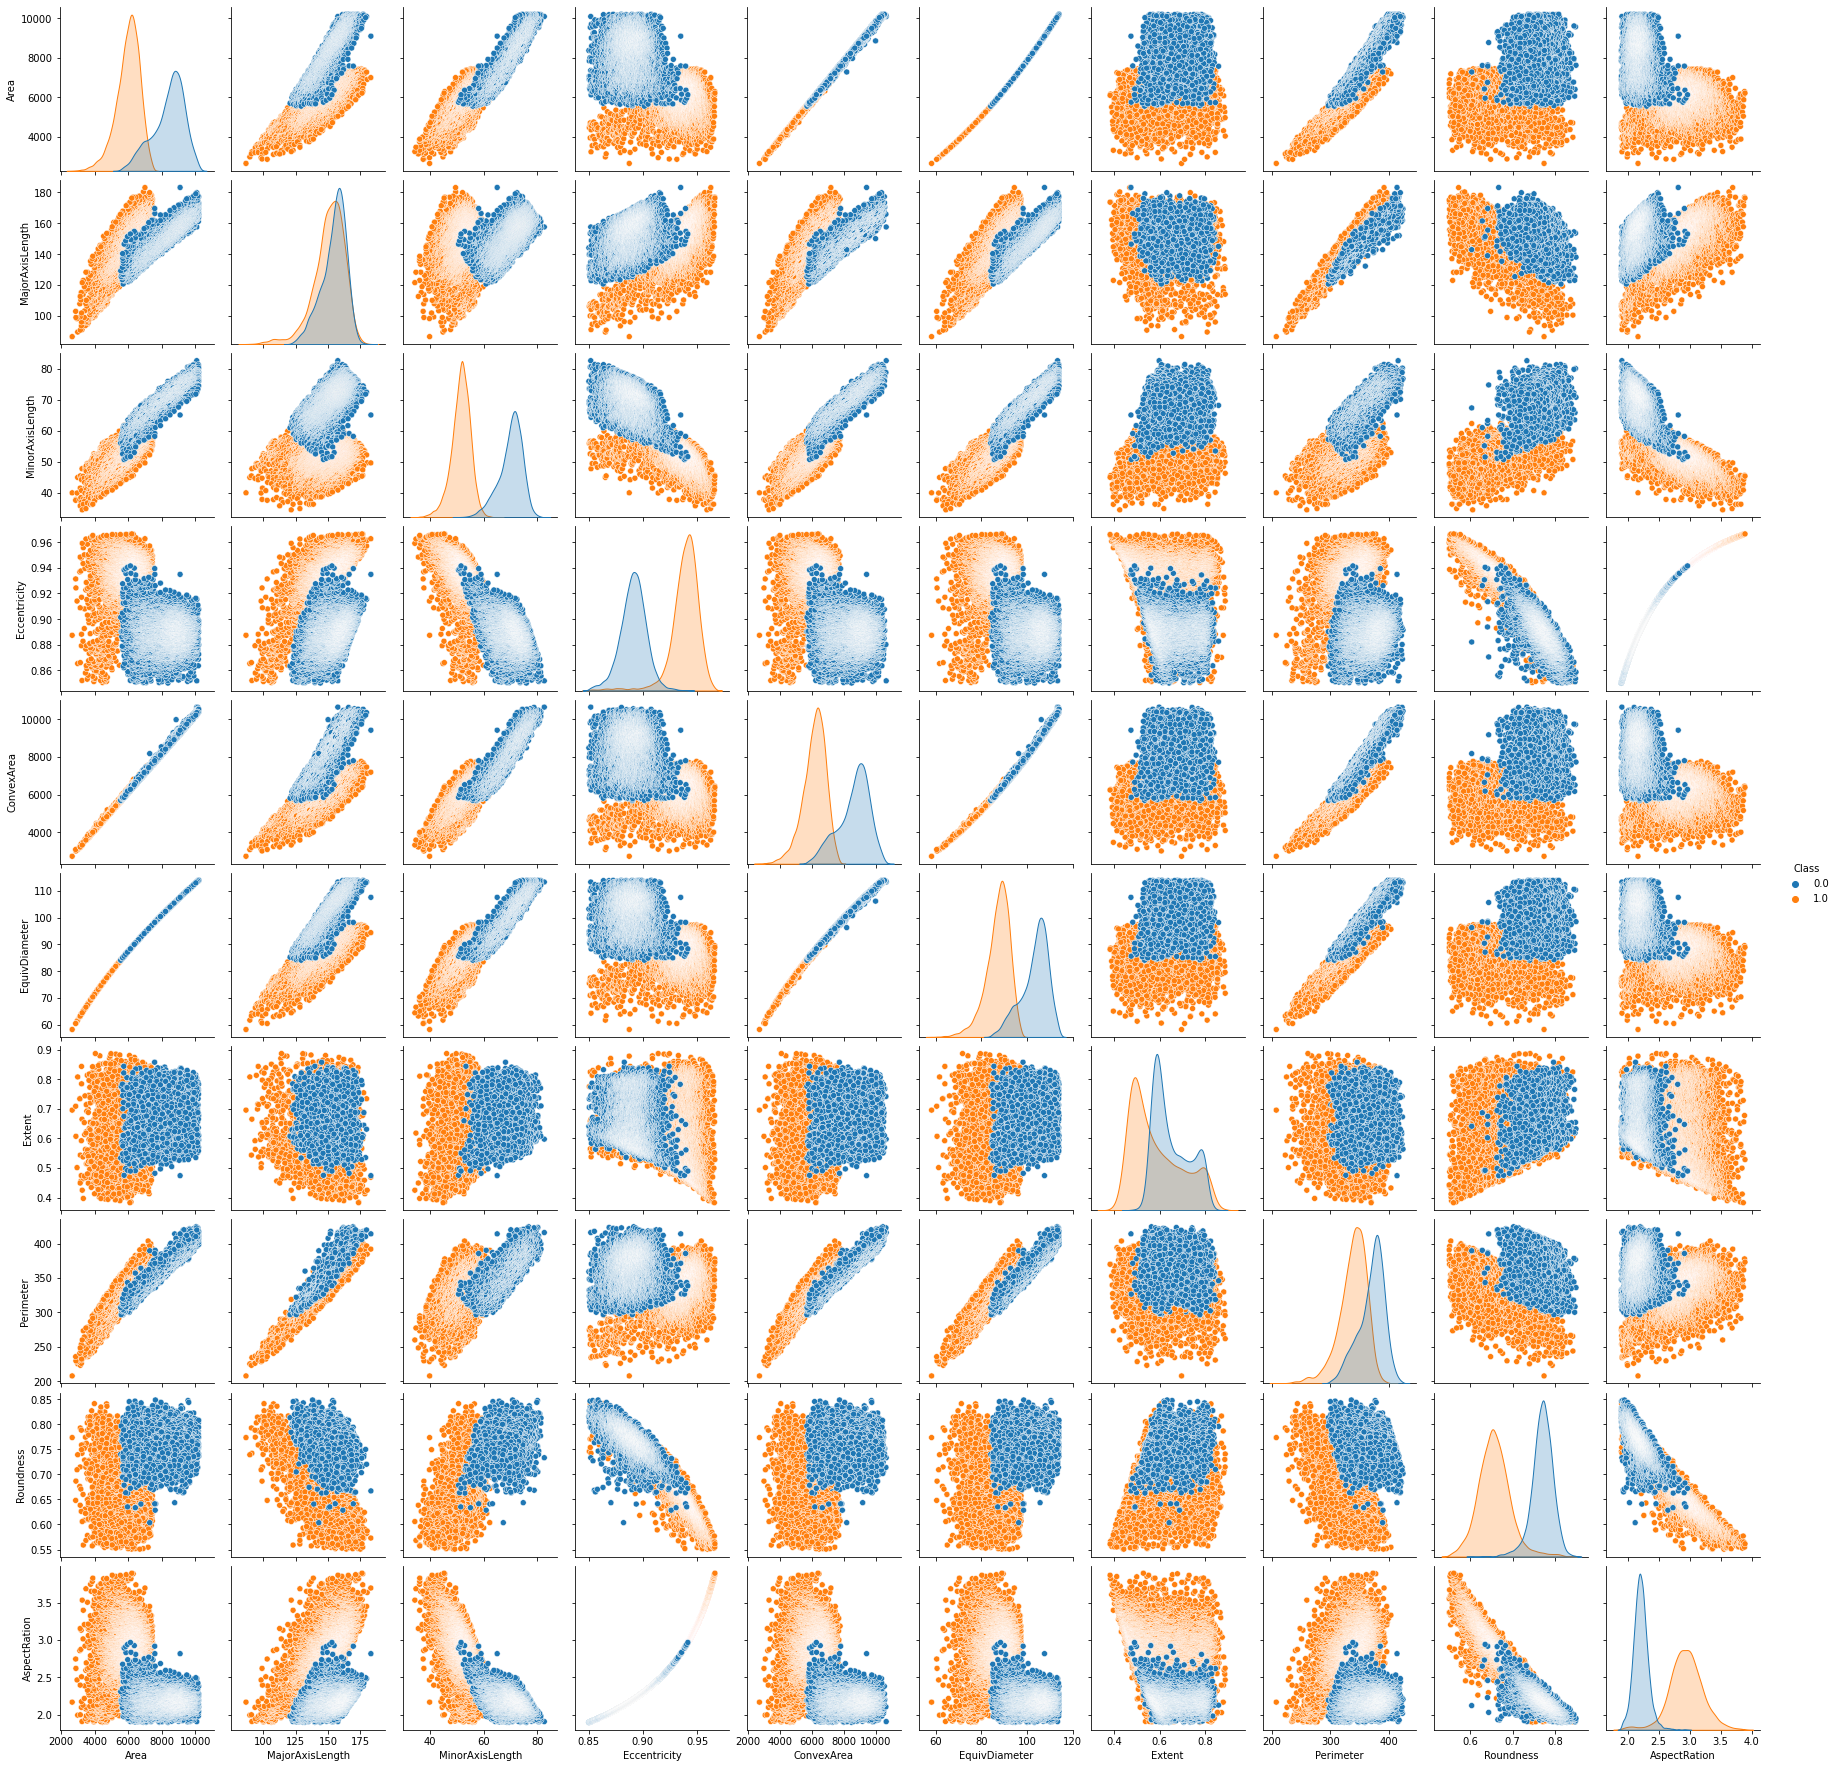

In [97]:
sns.pairplot(data = data, hue = "Class")
pass

In [98]:
corrMatrix = data.corr()
corrMatrix

Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
Area             1.000000         0.603439         0.946449     -0.690756   
MajorAxisLength  0.603439         1.000000         0.320815      0.141391   
MinorAxisLength  0.946449         0.320815         1.000000     -0.884125   
Eccentricity    -0.690756         0.141391        -0.884125      1.000000   
ConvexArea       0.999467         0.605617         0.945320     -0.688451   
EquivDiameter    0.998410         0.618578         0.941899     -0.680153   
Extent           0.240273        -0.052288         0.305708     -0.340468   
Perimeter        0.895345         0.873863         0.719893     -0.332136   
Roundness        0.676222        -0.136650         0.857901     -0.953616   
AspectRation    -0.681982         0.160093        -0.877111      0.979239   
Class           -0.826948        -0.170159        -0.917890      0.874718   

                 ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
Area               0.999467       0.998410  0.240273   0.895345   0.676222   
MajorAxisLength    0.605617       0.618578 -0.052288   0.873863  -0.136650   
MinorAxisLength    0.945320       0.941899  0.305708   0.719893   0.857901   
Eccentricity      -0.688451      -0.680153 -0.340468  -0.332136  -0.953616   
ConvexArea         1.000000       0.997798  0.237526   0.899200   0.668084   
EquivDiameter      0.997798       1.000000  0.236985   0.903947   0.666504   
Extent             0.237526       0.236985  1.000000   0.097954   0.361435   
Perimeter          0.899200       0.903947  0.097954   1.000000   0.285141   
Roundness          0.668084       0.666504  0.361435   0.285141   1.000000   
AspectRation      -0.679652      -0.672236 -0.345036  -0.315566  -0.960438   
Class             -0.824537      -0.821079 -0.302222  -0.562907  -0.860438   

                 AspectRation     Class  
Area                -0.681982 -0.826948  
MajorAxisLength      0.160093 -0.170159  
MinorAxisLength     -0.877111 -0.917890  
Eccentricity         0.979239  0.874718  
ConvexArea          -0.679652 -0.824537  
EquivDiameter       -0.672236 -0.821079  
Extent              -0.345036 -0.302222  
Perimeter           -0.315566 -0.562907  
Roundness           -0.960438 -0.860438  
AspectRation         1.000000  0.854112  
Class                0.854112  1.000000

In [99]:
sns.heatmap(corrMatrix)
pass

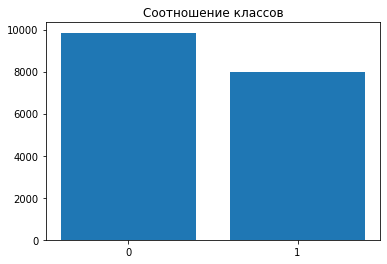

In [100]:
indexes = [0, 1]
cnts = data['Class'].value_counts().values

plt.title("Соотношение классов")
plt.xticks(indexes)
plt.bar(indexes, cnts)
plt.show()

In [102]:
data.to_csv('out.csv')

In [103]:
sns.heatmap(corrMatrix)
pass

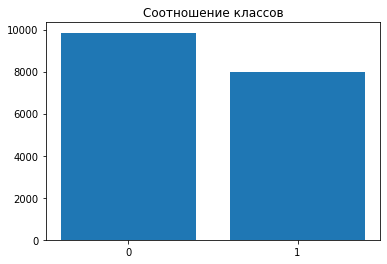

In [104]:
indexes = [0, 1]
cnts = data['Class'].value_counts().values

plt.title("Соотношение классов")
plt.xticks(indexes)
plt.bar(indexes, cnts)
plt.show()

In [105]:
data.to_csv('out.csv', index=False)

In [106]:
data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
89     4472.0       106.216259        55.861038      0.850535      4642.0   
90     3951.0       100.022328        52.476331      0.851320      4085.0   
91     4621.0       107.515859        56.390835      0.851418      4798.0   
92     4709.0       107.830578        56.550030      0.851451      4801.0   
93     4581.0       106.597203        55.874881      0.851615      4685.0   
...       ...              ...              ...           ...         ...   
18180  5853.0       148.624571        51.029281      0.939210      6008.0   
18181  7585.0       169.593996        58.141659      0.939398      7806.0   
18182  6365.0       154.777085        52.908085      0.939760      6531.0   
18183  5960.0       151.397924        51.474600      0.940427      6189.0   
18184  6134.0       153.081981        51.590606      0.941500      6283.0   

       EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
89         75.458116  0.775312    274.486   0.745884      1.901437    1.0  
90         70.926507  0.563784    253.792   0.770834      1.906047    1.0  
91         76.704889  0.658262    277.531   0.753916      1.906619    1.0  
92         77.431809  0.824405    265.248   0.841074      1.906817    1.0  
93         76.372183  0.565625    266.221   0.812242      1.907784    1.0  
...              ...       ...        ...        ...           ...    ...  
18180      86.326537  0.498594    332.960   0.663444      2.912535    0.0  
18181      98.272692  0.647461    385.506   0.641362      2.916910    0.0  
18182      90.023162  0.561287    342.253   0.682832      2.925396    0.0  
18183      87.112041  0.492399    343.371   0.635227      2.941216    0.0  
18184      88.374495  0.489975    338.613   0.672274      2.967245    0.0  

[17840 rows x 11 columns]